In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [16]:
df = pd.read_csv('data/processed/processed_data.csv')

### 1. Department wise performances

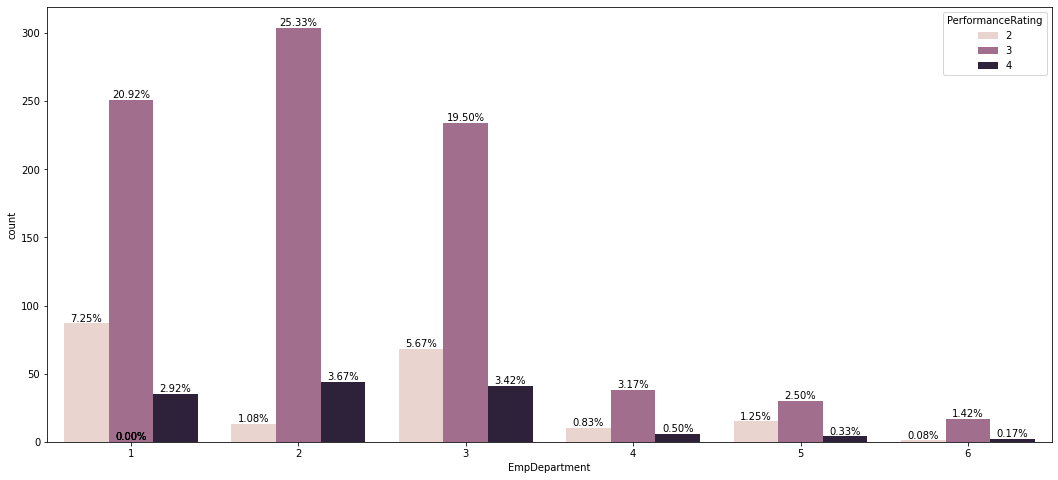

In [17]:
plt.figure(figsize=(18,8))
ax = sns.countplot(hue=df['PerformanceRating'], x=df['EmpDepartment'])

# Add percentage labels on top of each bar
total = len(df['EmpDepartment'])
for p in ax.patches:
    percentage = '{:.2f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')
    
plt.show()

**1** - Sales
**2** - Development
**3** - Data Science
**4** - Human Resources
**5** - Research & Development
**6** - Finance

From the graph we can understand that employees from `Development` department has the highest performance rating, and the `Finance` department has got the lowest performance rating


### 2. Top 3 Important Factors effecting employee performance

Top 3 Important Factors affecting employee performance:
                       Feature  Importance
13    EmpLastSalaryHikePercent    0.213072
8   EmpEnvironmentSatisfaction    0.178493
20     YearsSinceLastPromotion    0.090594


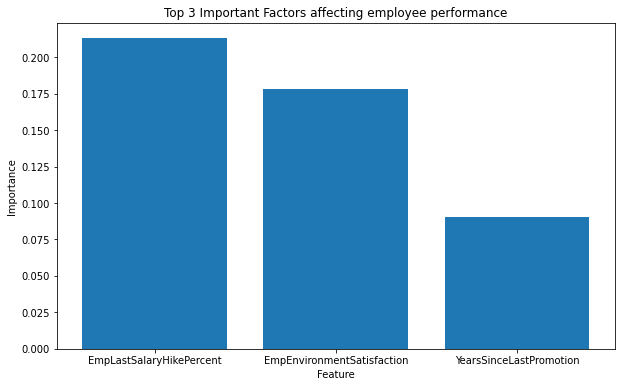

In [4]:
# Assuming 'X' is your feature matrix and 'y' is your target variable (PerformanceRating)
X = df.drop(['PerformanceRating'], axis=1)
y = df['PerformanceRating']

# Initialize RandomForestClassifier (you can use other classifiers as well)
rf_classifier = RandomForestClassifier()

# Fit the model
rf_classifier.fit(X, y)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 3 important factors
top_3_factors = feature_importance_df.head(3)
print("Top 3 Important Factors affecting employee performance:")
print(top_3_factors)

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.bar(top_3_factors['Feature'], top_3_factors['Importance'])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Top 3 Important Factors affecting employee performance')
plt.show()


These are the top 3 factors affecting the performance rating of an employee:

1. Employee last salary hike percent
2. Employee environment satisfaction
3. Years since last promotion